In [1]:
import yfinance as yf

stk_data = yf.download("RELIANCE.NS", start="2021-06-01", end="2022-05-01")
print(stk_data.head())


C:\Users\tiruk\AppData\Local\Temp\ipykernel_2820\140786367.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stk_data = yf.download("RELIANCE.NS", start="2021-06-01", end="2022-05-01")
[*********************100%***********************]  1 of 1 completed

Price             Close         High         Low         Open      Volume
Ticker      RELIANCE.NS  RELIANCE.NS RELIANCE.NS  RELIANCE.NS RELIANCE.NS
Date                                                                     
2021-06-01   987.374878  1002.443386  977.177403   986.054647    28013832
2021-06-02  1002.101990  1005.857738  981.957502   981.957502    24630162
2021-06-03  1005.925903  1024.294928  999.757398  1011.092856    23974257
2021-06-04   997.208069  1009.021575  994.362780  1008.270425    14468646
2021-06-07  1014.006531  1020.653085  994.704287  1002.443427    16336573


In [2]:
import pandas as pd
dataset = pd.read_csv("reliance_data.csv", skiprows=1)

In [3]:
dataset

,Ticker,RELIANCE.NS,RELIANCE.NS.1,RELIANCE.NS.2,RELIANCE.NS.3
0,Date,NaN,NaN,NaN,NaN
1,2021-06-01,987.374878,1002.443386,977.177403,986.054647
2,2021-06-02,1002.101929,1005.857676,981.957442,981.957442
3,2021-06-03,1005.925903,1024.294928,999.757398,1011.092856
4,2021-06-04,997.208069,1009.021575,994.362780,1008.270425
...,...,...,...,...,...
224,2022-04-25,1231.155029,1260.117952,1216.833432,1252.808769
225,2022-04-26,1267.998291,1276.837970,1236.956766,1238.007426
226,2022-04-27,1269.231689,1291.913249,1258.587463,1258.952988
227,2022-04-28,1288.190186,1302.420431,1272.772133,1283.667576


In [4]:
import pandas as pd
# Flatten column MultiIndex if exists
if isinstance(stk_data.columns, pd.MultiIndex):
    stk_data.columns = [col[0] for col in stk_data.columns]

# Check data
print("Data fetched successfully!")
print(stk_data.head())


Data fetched successfully!
                  Close         High         Low         Open    Volume
Date                                                                   
2021-06-01   987.374878  1002.443386  977.177403   986.054647  28013832
2021-06-02  1002.101990  1005.857738  981.957502   981.957502  24630162
2021-06-03  1005.925903  1024.294928  999.757398  1011.092856  23974257
2021-06-04   997.208069  1009.021575  994.362780  1008.270425  14468646
2021-06-07  1014.006531  1020.653085  994.704287  1002.443427  16336573


In [5]:
stk_data

,Close,High,Low,Open,Volume
Date,,,,,
2021-06-01,987.374878,1002.443386,977.177403,986.054647,28013832
2021-06-02,1002.101990,1005.857738,981.957502,981.957502,24630162
2021-06-03,1005.925903,1024.294928,999.757398,1011.092856,23974257
2021-06-04,997.208069,1009.021575,994.362780,1008.270425,14468646
2021-06-07,1014.006531,1020.653085,994.704287,1002.443427,16336573
...,...,...,...,...,...
2022-04-25,1231.155029,1260.117952,1216.833432,1252.808769,17063215
2022-04-26,1267.998291,1276.837970,1236.956766,1238.007426,12227666
2022-04-27,1269.231689,1291.913249,1258.587463,1258.952988,19338945


In [6]:
column="Close"

In [7]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data[[column]])
print("Len:",data1.shape)

Len: (228, 1)


In [8]:
len(data1)

228

In [9]:
training_size = round(len(data1 ) * 0.80)
print(training_size)
X_train=data1[:training_size]
X_test=data1[training_size:]
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size:]
print("y_train length:",y_train.shape)
print("y_test length:",y_test.shape)

182
X_train length: (182, 1)
X_test length: (46, 1)
y_train length: (182, 1)
y_test length: (46, 1)


In [10]:
from sklearn.metrics import mean_squared_error
trends=['n','t','c','ct']
lags=[1,2,3,4]
from statsmodels.tsa.ar_model import AutoReg
for i in lags:
    #print(i)
   
    for td in trends:
        
        #print(td)
        #trendslist.append(td)
        model = AutoReg(X_train, lags=i,trend=td)
        model_fit = model.fit()
        # make prediction
        y_pred= model_fit.predict(len(X_train), len(data1)-1)
        #print(y_pred)
        #mse=mean_squared_error(y_test,y_pred,squared=False)
        from stockFunctions import rmsemape
        print("Lag={},Trend={}".format(i,td))
        rmsemape(y_test,y_pred)
        print("************")

Lag=1,Trend=n
RMSE-Testset: 0.2692552570536749
maPe-Testset: 0.33707911295278103
************
Lag=1,Trend=t
RMSE-Testset: 0.14203027320185135
maPe-Testset: 0.23782391438610978
************
Lag=1,Trend=c
RMSE-Testset: 0.2523313938064075
maPe-Testset: 0.32362493433432615
************
Lag=1,Trend=ct
RMSE-Testset: 0.18429185945349008
maPe-Testset: 0.2709799880739184
************
Lag=2,Trend=n
RMSE-Testset: 0.27000107954947133
maPe-Testset: 0.3377759672987846
************
Lag=2,Trend=t
RMSE-Testset: 0.14094254543539084
maPe-Testset: 0.23729730079647893
************
Lag=2,Trend=c
RMSE-Testset: 0.2538514753519895
maPe-Testset: 0.32473912688379386
************
Lag=2,Trend=ct
RMSE-Testset: 0.17785732667652895
maPe-Testset: 0.2656207408457386
************
Lag=3,Trend=n
RMSE-Testset: 0.2763158369410807
maPe-Testset: 0.34331488225283635
************
Lag=3,Trend=t
RMSE-Testset: 0.13753552536679425
maPe-Testset: 0.23680194534087642
************
Lag=3,Trend=c
RMSE-Testset: 0.25771010819975987
maPe-Te

In [11]:
len(y_pred)

46

In [12]:
i=1
td='ct'
model = AutoReg(X_train, lags=i,trend=td)
model_fit = model.fit()
# make prediction
y_pred= model_fit.predict(len(X_train), len(data1)-1)
#print(y_pred)
from sklearn.metrics import r2_score
mse=mean_squared_error(y_test,y_pred,squared=False)
from stockFunctions import rmsemape
print("Lag={},Trend={}".format(i,td))
rmsemape(y_test,y_pred)
print("************")

Lag=1,Trend=ct
RMSE-Testset: 0.18429185945349008
maPe-Testset: 0.2709799880739184
************


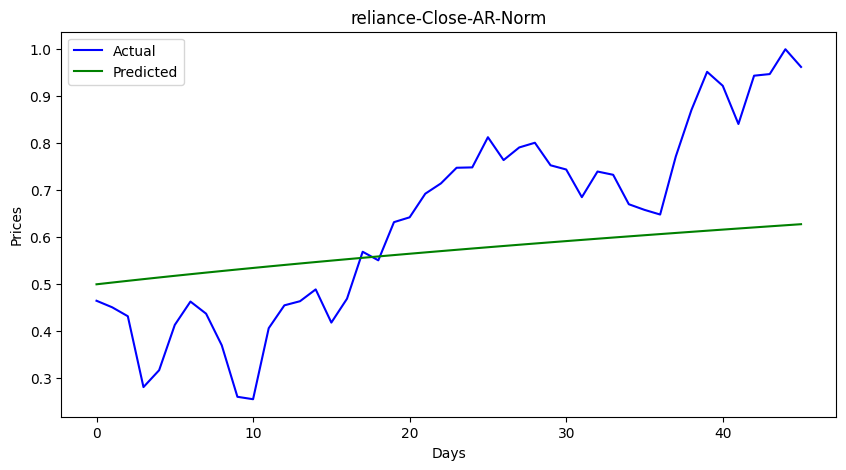

In [13]:
from stockFunctions import graph
graph(y_test,y_pred,"Actual","Predicted","reliance-Close-AR-Norm","Days","Prices")

In [14]:
len(data1)

228

In [15]:
y_test

array([[0.46472472],
       [0.45083126],
       [0.43177611],
       [0.28098854],
       [0.31693334],
       [0.41329385],
       [0.46300405],
       [0.43719324],
       [0.36995716],
       [0.26034044],
       [0.2551779 ],
       [0.40634746],
       [0.45497389],
       [0.46376868],
       [0.48887888],
       [0.41826514],
       [0.46912245],
       [0.56898835],
       [0.55076152],
       [0.63201811],
       [0.6422788 ],
       [0.69256222],
       [0.71448584],
       [0.74775358],
       [0.74851787],
       [0.81275912],
       [0.76406865],
       [0.79096288],
       [0.80096882],
       [0.75297929],
       [0.74405712],
       [0.68516999],
       [0.73972308],
       [0.73277669],
       [0.67012942],
       [0.6581477 ],
       [0.64820546],
       [0.77177967],
       [0.87075355],
       [0.95188309],
       [0.92218443],
       [0.84086415],
       [0.94366187],
       [0.94710322],
       [1.        ],
       [0.96227152]])

In [16]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])

In [17]:
aTestNormTable

,Close
0,0.464725
1,0.450831
2,0.431776
3,0.280989
4,0.316933
5,0.413294
6,0.463004
7,0.437193
8,0.369957
9,0.26034


In [18]:
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)

In [19]:
actual_stock_price_test_ori

array([[1096.34460449],
       [1091.3651123 ],
       [1084.53564453],
       [1030.49255371],
       [1043.37536621],
       [1077.91149902],
       [1095.72790527],
       [1086.47717285],
       [1062.37939453],
       [1023.09216309],
       [1021.24188232],
       [1075.421875  ],
       [1092.84985352],
       [1096.00195312],
       [1105.00158691],
       [1079.6932373 ],
       [1097.92077637],
       [1133.71325684],
       [1127.18066406],
       [1156.3034668 ],
       [1159.98095703],
       [1178.00280762],
       [1185.86035156],
       [1197.78369141],
       [1198.05761719],
       [1221.08203125],
       [1203.63110352],
       [1213.2701416 ],
       [1216.85632324],
       [1199.65661621],
       [1196.4588623 ],
       [1175.35339355],
       [1194.90551758],
       [1192.41589355],
       [1169.96276855],
       [1165.66845703],
       [1162.10510254],
       [1206.39477539],
       [1241.86755371],
       [1270.94482422],
       [1260.30065918],
       [1231.155

In [20]:
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

In [21]:
actual_stock_price_test_oriA

,Close
0,1096.344604
1,1091.365112
2,1084.535645
3,1030.492554
4,1043.375366
5,1077.911499
6,1095.727905
7,1086.477173
8,1062.379395
9,1023.092163


In [22]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

In [23]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,[column])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,[column])

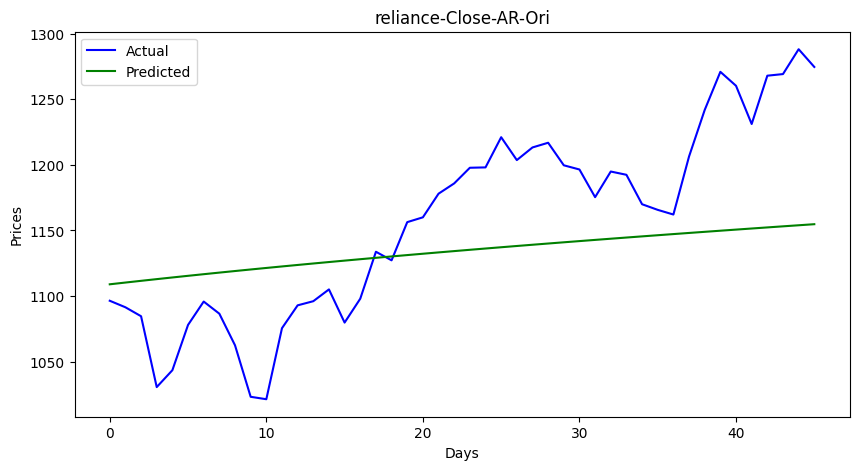

In [24]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","reliance-Close-AR-Ori","Days","Prices")

In [25]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 66.05120802458076
maPe-Testset: 0.04806495584497158


In [26]:
forecast=model_fit.predict(len(data1), len(data1)+3)

In [27]:
forecast

array([0.62989397, 0.63213237, 0.63435624, 0.63656602])

In [28]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [29]:
forecast_stock_price_test_oriF

,Closefore
0,1155.542166
1,1156.344421
2,1157.141467
3,1157.933463


In [30]:
forecast_stock_price_test_oriF.to_csv("CloseAR.csv",index=False)

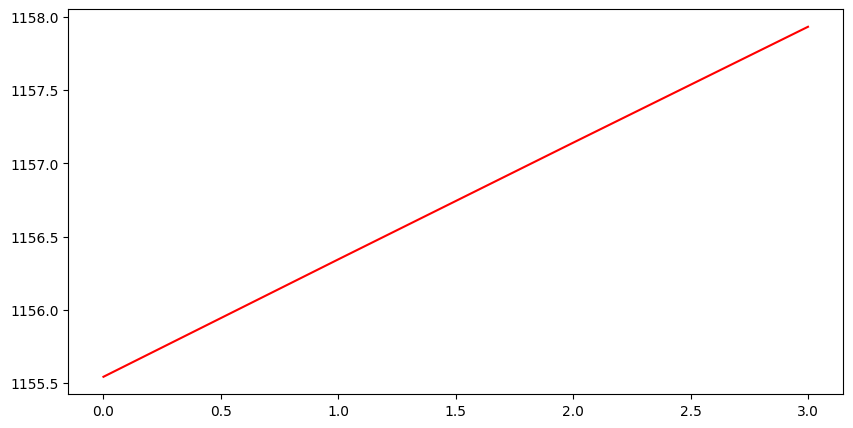

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(actual_stock_price_test_oriA[116:145], color = 'blue', label="Actual")
plt.plot(forecast_stock_price_test_oriF, color = 'red', label ="Predicted")